In [308]:
#import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [309]:
#load the data
df = pd.read_csv('Case_study.csv')
df.head()

,DATE,ANONYMIZED CATEGORY,ANONYMIZED PRODUCT,ANONYMIZED BUSINESS,ANONYMIZED LOCATION,QUANTITY,UNIT PRICE
0,"August 18, 2024, 9:32 PM",Category-106,Product-21f4,Business-de42,Location-1ba8,1,850
1,"August 18, 2024, 9:32 PM",Category-120,Product-4156,Business-de42,Location-1ba8,2,"1,910"
2,"August 18, 2024, 9:32 PM",Category-121,Product-49bd,Business-de42,Location-1ba8,1,"3,670"
3,"August 18, 2024, 9:32 PM",Category-76,Product-61dd,Business-de42,Location-1ba8,1,"2,605"
4,"August 18, 2024, 9:32 PM",Category-119,Product-66e0,Business-de42,Location-1ba8,5,"1,480"


### UNDERSTAND THE DATAFRAME STRUCTURE

In [310]:
#dimension of the dataframe
df.shape

(333405, 7)

In [311]:
#check for column datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333405 entries, 0 to 333404
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   DATE                 333405 non-null  object
 1   ANONYMIZED CATEGORY  333405 non-null  object
 2   ANONYMIZED PRODUCT   333405 non-null  object
 3   ANONYMIZED BUSINESS  333405 non-null  object
 4   ANONYMIZED LOCATION  333405 non-null  object
 5   QUANTITY             333405 non-null  int64 
 6   UNIT PRICE           333397 non-null  object
dtypes: int64(1), object(6)
memory usage: 17.8+ MB


Our dataset has 333,405 rows and 7 columns and no null values.We also observe that there is a mix of data types.

. Date: timestamp of the transaction
    
. Anonymized category: product category 
    
. Anonymized product: specific product within the category
    
. Anonymized businnes: company or outlet selling the product
    
. Anonymized location: geographic location of the sale
    
. Quantity: number of items purchased
    
. Unit price: price per product.


In [312]:
#check for column names
df.columns

Index(['DATE', 'ANONYMIZED CATEGORY', 'ANONYMIZED PRODUCT',
       'ANONYMIZED BUSINESS', 'ANONYMIZED LOCATION', 'QUANTITY', 'UNIT PRICE'],
      dtype='object')

In [313]:
#check for the missing values 
df.isnull().sum()

DATE                   0
ANONYMIZED CATEGORY    0
ANONYMIZED PRODUCT     0
ANONYMIZED BUSINESS    0
ANONYMIZED LOCATION    0
QUANTITY               0
UNIT PRICE             8
dtype: int64

In [314]:
# Check the rows with missing UnitPrice
missing_rows = df[df['UNIT PRICE'].isna()]
print(f"Rows with missing UnitPrice:\n{missing_rows}")

Rows with missing UnitPrice:
                              DATE ANONYMIZED CATEGORY ANONYMIZED PRODUCT  \
108112       July 3, 2024, 5:53 PM         Category-94       Product-3d7f   
150961  December 16, 2024, 6:33 PM         Category-79       Product-dfc8   
151142  December 22, 2024, 2:42 PM        Category-122       Product-15e0   
272379     June 27, 2024, 12:15 PM         Category-92       Product-ccbc   
278284    August 14, 2024, 9:09 PM        Category-101       Product-84a5   
278384  December 30, 2024, 2:17 PM         Category-95       Product-15f3   
310385     March 31, 2024, 2:03 PM        Category-114       Product-9204   
327152    August 13, 2024, 4:20 PM        Category-107       Product-7eed   

       ANONYMIZED BUSINESS ANONYMIZED LOCATION  QUANTITY UNIT PRICE  
108112       Business-4fce       Location-f37d         2        NaN  
150961       Business-8bbf       Location-3fc0         1        NaN  
151142       Business-c575       Location-1979         3        NaN

In [315]:
## Drop rows with missing UnitPrice
df= df.dropna(subset=['UNIT PRICE'])

In [316]:
#save the cleaned dataset
df.to_csv("cleaned_data.csv", index=False)

In [317]:
# Save the dropped rows to a CSV for reference
missing_rows.to_csv("dropped_rows.csv", index=False)

#### handling missing values


The UnitPrice column has 8 missing values and the original dataset had 333,405 rows.
Although,these values are critical for analysis and imputation was not suitable ,the rows were dropped.
After dropping 8 rows with missing values in UnitPrice, the dataset was reduced to 333,397 rows.
Identified rows with missing UnitPrice using isna().
Dropped the rows using dropna() while keeping the remaining data intact.


In [318]:
#check for duplicated values
duplicate_count = df.duplicated().sum()
print(f"Total Duplicates: {duplicate_count}")

Total Duplicates: 3524


In [319]:
# Detailed view of duplicate rows
df[df.duplicated(keep=False)]

,DATE,ANONYMIZED CATEGORY,ANONYMIZED PRODUCT,ANONYMIZED BUSINESS,ANONYMIZED LOCATION,QUANTITY,UNIT PRICE
310,"May 17, 2024, 8:27 PM",Category-120,Product-1e80,Business-9909,Location-689f,1,"1,970"
311,"May 17, 2024, 8:27 PM",Category-75,Product-8f75,Business-9909,Location-689f,1,"4,020"
426,"January 31, 2024, 7:34 PM",Category-76,Product-e805,Business-bf85,Location-1ba8,5,"7,018"
526,"February 5, 2024, 6:24 PM",Category-120,Product-29ee,Business-bfcd,Location-3e32,5,"2,290"
570,"April 19, 2024, 3:19 PM",Category-75,Product-086d,Business-b48e,Location-03fc,3,"2,090"
...,...,...,...,...,...,...,...
333133,"February 1, 2024, 9:17 AM",Category-111,Product-7fac,Business-4919,Location-3e32,3,814
333134,"February 1, 2024, 9:17 AM",Category-77,Product-d09c,Business-4919,Location-3e32,1,"3,200"
333350,"June 10, 2024, 10:08 PM",Category-76,Product-e805,Business-54ad,Location-3e32,5,"5,965"
333399,"January 9, 2024, 8:49 PM",Category-97,Product-bbdc,Business-f9ff,Location-1979,1,341


#### Handling Duplicates

There are 5,706 duplicate rows in the dataset. 

The duplicates are not errors but rather represent meaningful transactions.

This is because each row reflects distinct purchase events, occurring at the same day,time and same locations involving different quantities and unitprice for different products.

Therefore, it's prudent to retain the duplicates for the analysis:
    
    . Each duplicate row represents a valid transaction with distinct details.
    
    . Removing duplicates woud lead to loss of information and lead to inaccurate conclusiions about total sales, trends and customer behaviour.

In [320]:
#rename the columns to preferred right case
df.columns = [
    'Date', 
    'Anonymized category', 
    'Anonymized product', 
    'Anonymized business', 
    'Anonymized location', 
    'Quantity', 
    'UnitPrice'
]

In [321]:
# confirm the changes
df.columns

Index(['Date', 'Anonymized category', 'Anonymized product',
       'Anonymized business', 'Anonymized location', 'Quantity', 'UnitPrice'],
      dtype='object')

In [322]:
#Inconsistent Data Types
#Convert DATE column to datetime format.
#Remove commas and convert UNIT PRICE to float
# Add new column 'Value' as a product of 'Quantity'* 'UnitPrice'

df['Date'] = pd.to_datetime(df['Date'])

df['UnitPrice'] = df['UnitPrice'].str.replace(',', '').astype(float)

df['Total_Value'] = df['Quantity'] * df['UnitPrice']

In [323]:
df.head()

,Date,Anonymized category,Anonymized product,Anonymized business,Anonymized location,Quantity,UnitPrice,Total_Value
0,2024-08-18 21:32:00,Category-106,Product-21f4,Business-de42,Location-1ba8,1,850.0,850.0
1,2024-08-18 21:32:00,Category-120,Product-4156,Business-de42,Location-1ba8,2,1910.0,3820.0
2,2024-08-18 21:32:00,Category-121,Product-49bd,Business-de42,Location-1ba8,1,3670.0,3670.0
3,2024-08-18 21:32:00,Category-76,Product-61dd,Business-de42,Location-1ba8,1,2605.0,2605.0
4,2024-08-18 21:32:00,Category-119,Product-66e0,Business-de42,Location-1ba8,5,1480.0,7400.0


In [324]:
#make a copy of original dataframe
df1 = df.copy()
df1.head()

,Date,Anonymized category,Anonymized product,Anonymized business,Anonymized location,Quantity,UnitPrice,Total_Value
0,2024-08-18 21:32:00,Category-106,Product-21f4,Business-de42,Location-1ba8,1,850.0,850.0
1,2024-08-18 21:32:00,Category-120,Product-4156,Business-de42,Location-1ba8,2,1910.0,3820.0
2,2024-08-18 21:32:00,Category-121,Product-49bd,Business-de42,Location-1ba8,1,3670.0,3670.0
3,2024-08-18 21:32:00,Category-76,Product-61dd,Business-de42,Location-1ba8,1,2605.0,2605.0
4,2024-08-18 21:32:00,Category-119,Product-66e0,Business-de42,Location-1ba8,5,1480.0,7400.0


## FEATURE ENGINEERING

In [325]:
# Create Month-Year column from datetime Date
df1['Month-Year'] = df1['Date'].dt.strftime('%B %Y')




In [326]:
# Ensure 'Month-Year' is in a recognizable datetime format
df1['Month-Year'] = pd.to_datetime(df1['Month-Year'], format='%B %Y')

# Sort the dataframe by the 'Month-Year' column in chronological order
df1 = df1.sort_values(by='Month-Year')

# convert the 'Month-Year' column back to the desired string format (e.g., "January 2024")
df1['Month-Year'] = df1['Month-Year'].dt.strftime('%B %Y')

# Reset index to reflect the new order
df1 = df1.reset_index(drop=True)

# Display the sorted dataframe
print(df1.head())


                 Date Anonymized category Anonymized product  \
0 2024-01-24 16:40:00         Category-76       Product-e805   
1 2024-01-26 16:59:00        Category-107       Product-8d56   
2 2024-01-26 16:59:00         Category-91       Product-cae5   
3 2024-01-26 16:59:00         Category-91       Product-e125   
4 2024-01-10 14:44:00        Category-120       Product-29ee   

  Anonymized business Anonymized location  Quantity  UnitPrice  Total_Value  \
0       Business-eb52       Location-f37d         3     7285.0      21855.0   
1       Business-c89b       Location-03fc         1     1485.0       1485.0   
2       Business-c89b       Location-03fc         1      615.0        615.0   
3       Business-c89b       Location-03fc         1     1510.0       1510.0   
4       Business-965c       Location-3e32         5     2166.0      10830.0   

     Month-Year  
0  January 2024  
1  January 2024  
2  January 2024  
3  January 2024  
4  January 2024  


In [327]:
# Remove the timestamp from the 'Date' column
df1['Date'] = pd.to_datetime(df1['Date']).dt.date

In [328]:
df1

,Date,Anonymized category,Anonymized product,Anonymized business,Anonymized location,Quantity,UnitPrice,Total_Value,Month-Year
0,2024-01-24,Category-76,Product-e805,Business-eb52,Location-f37d,3,7285.0,21855.0,January 2024
1,2024-01-26,Category-107,Product-8d56,Business-c89b,Location-03fc,1,1485.0,1485.0,January 2024
2,2024-01-26,Category-91,Product-cae5,Business-c89b,Location-03fc,1,615.0,615.0,January 2024
3,2024-01-26,Category-91,Product-e125,Business-c89b,Location-03fc,1,1510.0,1510.0,January 2024
4,2024-01-10,Category-120,Product-29ee,Business-965c,Location-3e32,5,2166.0,10830.0,January 2024
...,...,...,...,...,...,...,...,...,...
333392,2024-12-16,Category-120,Product-4156,Business-d963,Location-4ea1,2,1900.0,3800.0,December 2024
333393,2024-12-16,Category-94,Product-3d7f,Business-d963,Location-4ea1,1,885.0,885.0,December 2024
333394,2024-12-20,Category-120,Product-29ee,Business-a223,Location-03fc,5,1735.0,8675.0,December 2024
333395,2024-12-01,Category-119,Product-43ad,Business-a8d5,Location-3e32,5,1820.0,9100.0,December 2024


In [329]:
df1.dtypes

Date                    object
Anonymized category     object
Anonymized product      object
Anonymized business     object
Anonymized location     object
Quantity                 int64
UnitPrice              float64
Total_Value            float64
Month-Year              object
dtype: object

In [330]:
df1.describe()

,Quantity,UnitPrice,Total_Value
count,333397.000000,333397.000000,3.333970e+05
mean,2.321149,2322.039538,5.369872e+03
std,3.790518,1585.256624,1.123618e+04
min,0.000000,0.000000,0.000000e+00
25%,1.000000,1420.000000,1.520000e+03
50%,1.000000,1840.000000,2.750000e+03
75%,2.000000,2755.000000,5.590000e+03
max,359.000000,16136.000000,1.914000e+06


In [331]:
#confirm null values
df1.isnull().sum()

Date                   0
Anonymized category    0
Anonymized product     0
Anonymized business    0
Anonymized location    0
Quantity               0
UnitPrice              0
Total_Value            0
Month-Year             0
dtype: int64

### EXPLORATORY DATA ANALYSIS  

In [332]:
# Total Quantity and Value by Category
# Group the data by 'ANONYMIZED CATEGORY' and calculate the sum of 'QUANTITY' and mean 'Value' for each category
sales_by_category = df1.groupby('Anonymized category').agg({
   'Quantity': 'sum',
    'Total_Value': 'sum'
}).reset_index()



In [333]:
sales_by_category.head()

,Anonymized category,Quantity,Total_Value
0,Category-100,77704,136417463.0
1,Category-101,19782,35964827.0
2,Category-102,1941,501824.0
3,Category-104,1222,1564133.0
4,Category-105,1656,2844024.0


In [334]:

# Group the data by 'ANONYMIZED CATEGORY' and 
#calculate the sum of 'QUANTITY' and 'UNIT PRICE' for each category

sales_by_business = df1.groupby('Anonymized business').agg({
    # Sum the 'Quantity' column
    'Quantity': 'sum',
    # Sum the 'Value' column
    'Total_Value': 'sum'
    # # Reset the index to turn the result back into a DataFrame instead of a GroupBy object
}).reset_index()


In [335]:
sales_by_business

,Anonymized business,Quantity,Total_Value
0,Business-0000,8,10445.0
1,Business-0005,1,2645.0
2,Business-0029,26,77340.0
3,Business-003d,98,221761.0
4,Business-0072,127,225056.0
...,...,...,...
4795,Business-ffa9,3,6740.0
4796,Business-ffae,6,10530.0
4797,Business-ffb1,266,438115.0
4798,Business-ffd2,39,78548.0


### Visualization

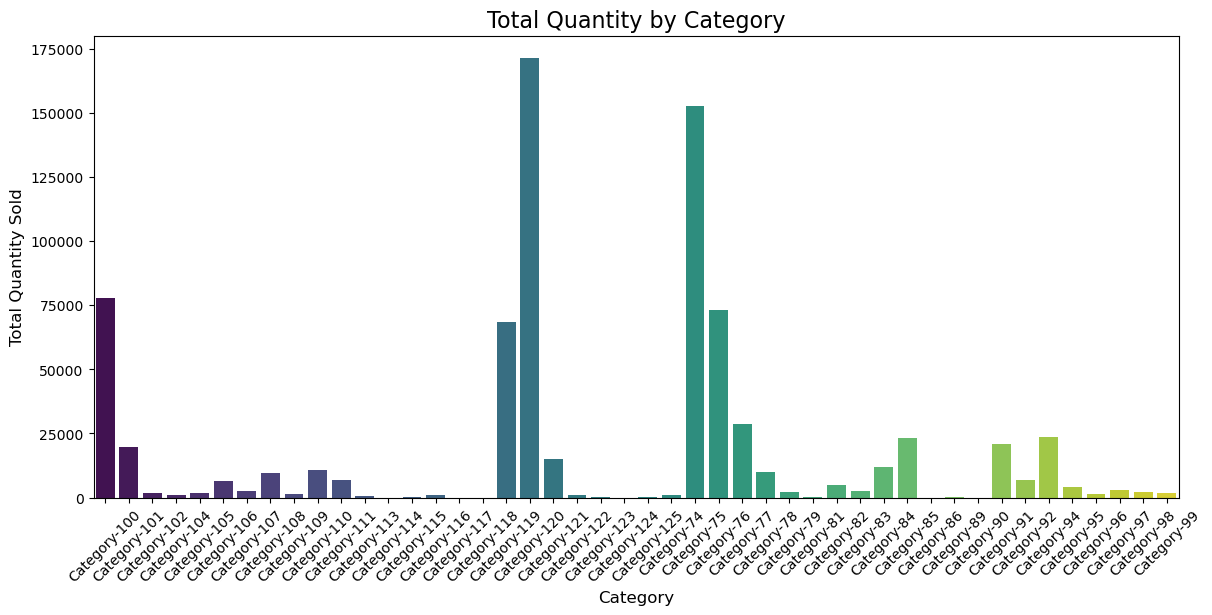

In [336]:
# Set figure size
plt.figure(figsize=(14, 6))  
sns.barplot(x='Anonymized category', y='Quantity', data=sales_by_category, palette='viridis')

# Adding title and labels
plt.title('Total Quantity by Category', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Total Quantity Sold', fontsize=12)
# Rotate x-axis labels for better readability
plt.xticks(rotation=45)  
plt.show()

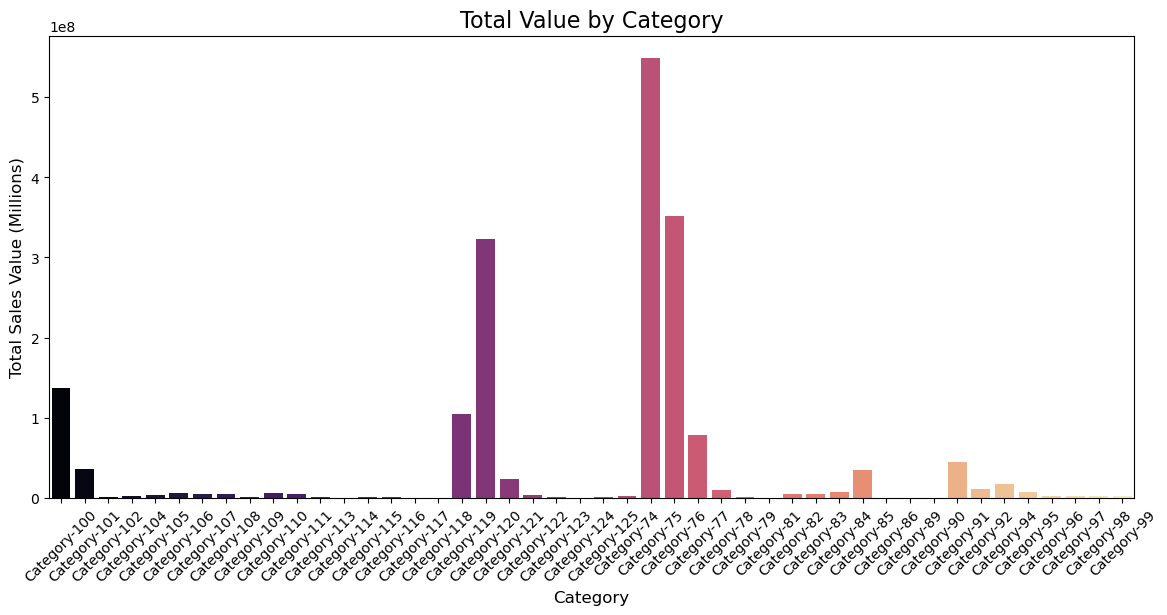

In [337]:
plt.figure(figsize=(14, 6))
sns.barplot(x='Anonymized category', y='Total_Value', data=sales_by_category, palette='magma')

# Adding title and labels
plt.title('Total Value by Category', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Total Sales Value (Millions)', fontsize=12)
plt.xticks(rotation=45)
plt.show()


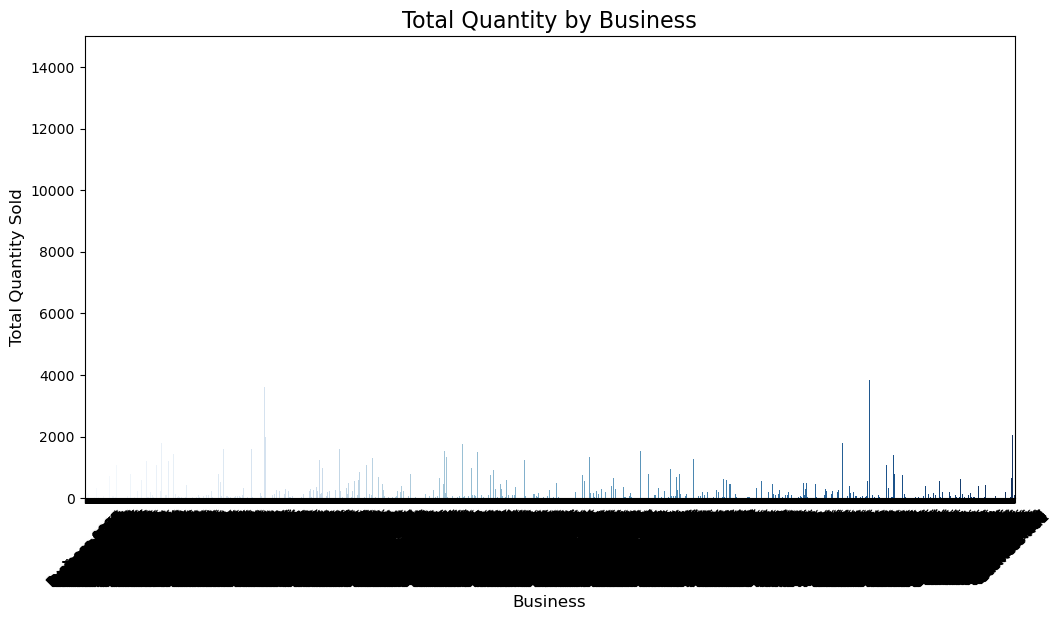

In [338]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Anonymized business', y='Quantity', data=sales_by_business, palette='Blues')

# Adding title and labels
plt.title('Total Quantity by Business', fontsize=16)
plt.xlabel('Business', fontsize=12)
plt.ylabel('Total Quantity Sold', fontsize=12)
plt.ylim(0, 15000)
sales_by_business = sales_by_business.sort_values(by='Quantity', ascending=False)
plt.xticks(rotation=45)
plt.show()

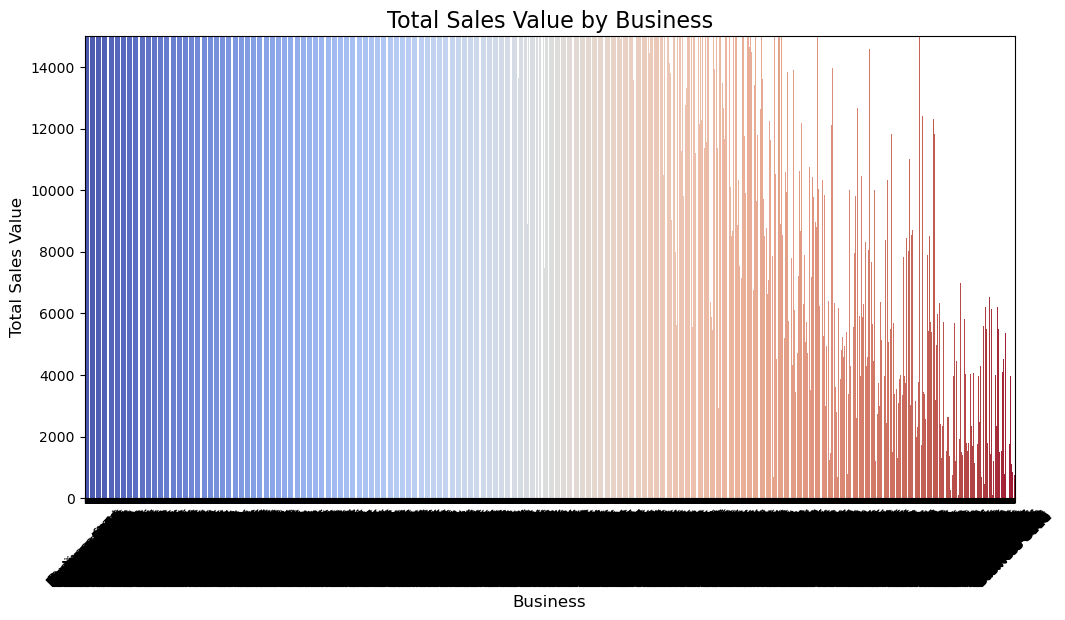

In [339]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Anonymized business', y='Total_Value', data=sales_by_businnes, palette='coolwarm')

# Adding title and labels
plt.title('Total Sales Value by Business', fontsize=16)
plt.xlabel('Business', fontsize=12)
plt.ylabel('Total Sales Value', fontsize=12)
plt.ylim(0, 15000)
sales_by_business = sales_by_business.sort_values(by='Quantity', ascending=False)
plt.xticks(rotation=45)
plt.show()


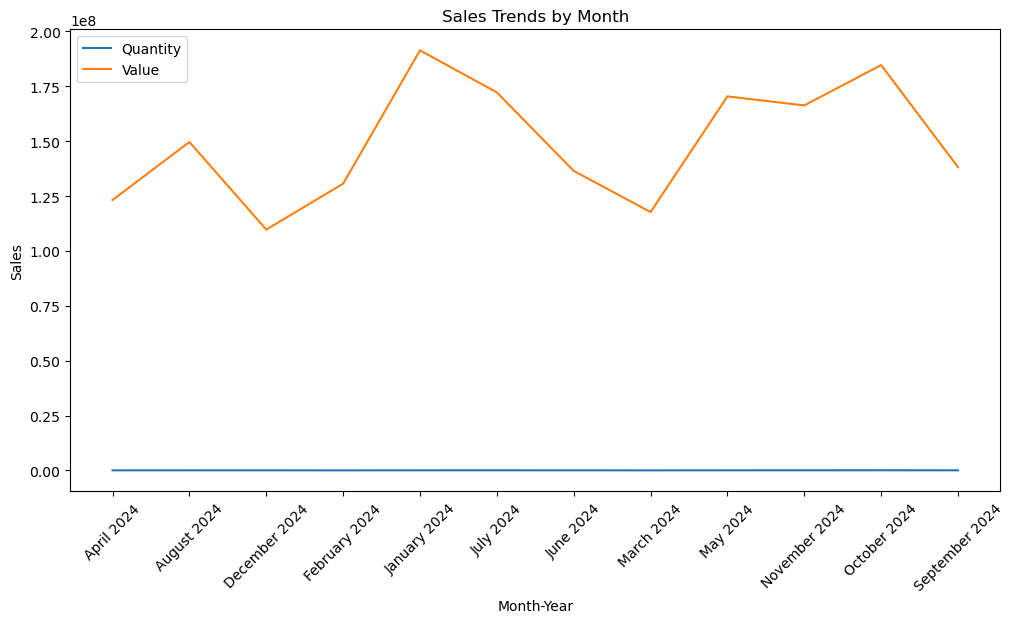

In [340]:

# Analyze monthly sales trends

monthly_sales = df1.groupby('Month-Year').agg({
    'Quantity': 'sum',
    'Total_Value': 'sum'
}).reset_index()

monthly_sales = monthly_sales.sort_values('Month-Year')

# Create line plot
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['Month-Year'], monthly_sales['Quantity'])
plt.plot(monthly_sales['Month-Year'], monthly_sales['Total_Value'])
plt.title('Sales Trends by Month')
plt.xlabel('Month-Year')
plt.ylabel('Sales')
plt.legend(['Quantity', 'Value'])
plt.xticks(rotation=45)
plt.show()

In [341]:
# Top 5 most frequently purchased products
top_quantity_products = df1.groupby('Anonymized product').agg({
    'Quantity': 'sum'
}).nlargest(5, 'Quantity')
print("Top 5 Most Frequently Purchased Products:")
print(top_quantity_products)

# Top 5 most valuable products  
top_value_products = df1.groupby('Anonymized product').agg({
    'Total_Value': 'sum'
}).nlargest(5, 'Total_Value')
print("\nTop 5 Most Valuable Products:")
print(top_value_products)

Top 5 Most Frequently Purchased Products:
                    Quantity
Anonymized product          
Product-66e0           47170
Product-e805           43577
Product-8f75           38032
Product-29ee           36639
Product-4156           28704

Top 5 Most Valuable Products:
                    Total_Value
Anonymized product             
Product-e805        268760281.0
Product-8f75        160773305.0
Product-66e0         71038955.0
Product-29ee         69722392.0
Product-4156         57413221.0


##### Segmentation Analysis

In [342]:
business_metrics = df.groupby('Anonymized business').agg({
    'Quantity': 'sum', 
    'Total_Value': 'sum',
    'Date': 'count'
}).rename(columns={'Date': 'Transaction_Frequency'})

In [343]:
#Normalized features:
scaler = StandardScaler()
scaled_metrics = scaler.fit_transform(business_metrics)

In [344]:
#K-means clustering:
kmeans = KMeans(n_clusters=3, random_state=42)
business_metrics['Segment'] = kmeans.fit_predict(scaled_metrics)

In [345]:
#Segment labels:
segment_map = {0: 'Low', 1: 'Medium', 2: 'High'}
business_metrics['Segment_Label'] = business_metrics['Segment'].map(segment_map)

##### Segment recommendations:
##### High Value Businesses: 
Attract high end clients and contribute the highest sales volume and value.
They should offer loyalty programs such as rewards and ensure personalized account management, 
provide customized products/services to strengthen the valuable customer relationships.
    
##### Medium Value Businesses: 
They a ttract group of customers that represents moderate but consistent sales. 
They should provide volume discounts for bulk orders and target them with promotions for complementary products to increase their loyalty.
    
##### Low Value Businesses:
They deal with a group of customers that are said to have lower overall impact.
They should work on re-engaging them through cost-effective marketing campaigns like reactivation emails and 
social media ads can help grow their purchase activity over time.
    
    

### Forecasting

In [346]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA

In [347]:
monthly_sales = df1.groupby('Month-Year',).agg({'Total_Value': 'sum'}).reset_index()

In [348]:
monthly_sales 

,Month-Year,Total_Value
0,April 2024,123188281.0
1,August 2024,149600209.0
2,December 2024,109713119.0
3,February 2024,130626309.0
4,January 2024,191349182.0
5,July 2024,172210289.0
6,June 2024,136459712.0
7,March 2024,117696757.0
8,May 2024,170372397.0
9,November 2024,166267139.0


In [349]:
print(monthly_sales)

        Month-Year  Total_Value
0       April 2024  123188281.0
1      August 2024  149600209.0
2    December 2024  109713119.0
3    February 2024  130626309.0
4     January 2024  191349182.0
5        July 2024  172210289.0
6        June 2024  136459712.0
7       March 2024  117696757.0
8         May 2024  170372397.0
9    November 2024  166267139.0
10    October 2024  184655201.0
11  September 2024  138160705.0


In [350]:
monthly_sales['Month-Year']

0         April 2024
1        August 2024
2      December 2024
3      February 2024
4       January 2024
5          July 2024
6          June 2024
7         March 2024
8           May 2024
9      November 2024
10      October 2024
11    September 2024
Name: Month-Year, dtype: object

In [351]:
# Check the first few values of the index
print(monthly_sales.head())


      Month-Year  Total_Value
0     April 2024  123188281.0
1    August 2024  149600209.0
2  December 2024  109713119.0
3  February 2024  130626309.0
4   January 2024  191349182.0


In [352]:
# Convert the 'Month-Year' index to datetime if not already done
monthly_sales.index = pd.to_datetime(monthly_sales.index)

# Group data by month, summing the 'Total_Value' (sales) for each month
monthly_sales = monthly_sales.resample('M').sum()

# Check the data (optional)
print(monthly_sales.head())

             Total_Value
1970-01-31  1.790299e+09


In [353]:
monthly_sales.index = pd.to_datetime(monthly_sales.index)
#monthly_sales = monthly_sales.asfreq('MS')  # Set to Monthly Start frequency

monthly_sales = monthly_sales.asfreq('MS')
monthly_sales.set_index('Month-Year', inplace=True)

KeyError: "None of ['Month-Year'] are in the columns"

In [298]:
monthly_sales

,Total_Value
Month-Year,
NaN,NaN


In [293]:
if len(monthly_sales) < 12:
    seasonal_periods = len(monthly_sales)
    print(f"Not enough data for 12 seasonal periods. Adjusting to {seasonal_periods}.")
else:
    seasonal_periods = 12

Not enough data for 12 seasonal periods. Adjusting to 1.


In [ ]:

model = ARIMA(monthly_sales['Total_Value'], order=(1,0,1)).fit()
forecast = model.forecast(3)
print(forecast)

ValueError: shapes (0,1,1) and (0,) not aligned: 1 (dim 2) != 0 (dim 0)

From the ARIMA model forecasts the following sales values for the next 3 months;
    January 2025:  150,331,800
    February 2025: 149,709,000
    March 2025: 149,426,400

In [ ]:
# Calculate Z-scores to detect anomalies
df1['Z-Score'] = (df1['Value'] - df1['Value'].mean()) / df1['Value'].std()

# Flag anomalies (e.g., Z-Score > 3 or < -3)
df1['Anomaly'] = df1['Z-Score'].apply(lambda x: True if abs(x) > 3 else False)

# Plot the data with anomalies highlighted
plt.figure(figsize=(10, 6))
plt.plot(df1.index, df1['Value'], label='Sales Value', color='blue', marker='o')
plt.scatter(df1.index[df1['Anomaly']], df1['Value'][df1['Anomaly']],
            color='red', label='Anomalies', zorder=5)
plt.title("Sales Value with Anomalies")
plt.xlabel("Date")
plt.ylabel("Sales Value")
plt.legend()
plt.show()

# Output the anomalies for investigation
print("Anomalies Detected:")
print(df1[df1['Anomaly']])

OverflowError: Exceeded cell block limit (set 'agg.path.chunksize' rcparam)

<Figure size 1000x600 with 1 Axes>

Anomalies Detected:
                    Date Anonymized category Anonymized product  \
Month-Year                                                        
2024-06-01  2024-06-2024         Category-75       Product-8f75   
2024-07-01  2024-07-2024         Category-76       Product-e805   
2024-02-01  2024-02-2024         Category-75       Product-4832   
2024-10-01  2024-10-2024         Category-75       Product-2175   
2024-01-01  2024-01-2024        Category-120       Product-29ee   
...                  ...                 ...                ...   
2024-07-01  2024-07-2024        Category-119       Product-66e0   
2024-07-01  2024-07-2024        Category-100       Product-3d03   
2024-01-01  2024-01-2024        Category-120       Product-3050   
2024-01-01  2024-01-2024        Category-120       Product-4156   
2024-11-01  2024-11-2024         Category-75       Product-faa5   

           Anonymized businnes Anonymized location  Quantity  UnitPrice  \
Month-Year                       

There are anomalies noted in our data indicated by unusual spikes and  drops in sales performance based on Value and Quantity.

##### Unusual Spikes & unusual drops: 
    
The sudden increase in sales during a specific month might indicate a successful promotional eventor marketing campaign.

Seasons  such as holidays can lead to a spike or rise sales.

A drop in sales might be due to inventory issues or supply chain disruptions that lead to stock shortage.

A decrease in demand could be due to competitor activity(market competition) or new product launches by rivals thus affecting the business sales.




In [44]:
# Correlation Analysis
def correlation_analysis(df1):
    correlation = df1[['Quantity', 'Value']].corr()
    plt.figure(figsize=(8,6))
    sns.heatmap(correlation, annot=True)
    plt.title('Correlation between Quantity and Value')
    
    return correlation

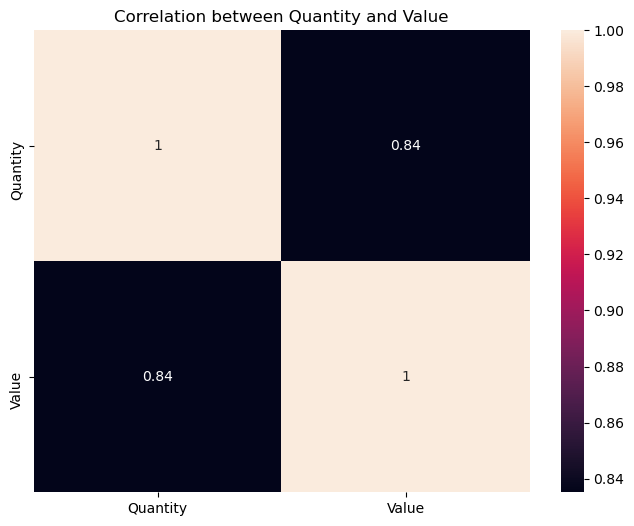

In [ ]:
correlation = correlation_analysis(df1)

In [ ]:
correlation = df1[['Quantity', 'Value']].corr()
correlation

,Quantity,Value
Quantity,1.000000,0.835122
Value,0.835122,1.000000


The correlation coefficient of 0.84 indicates a strong positive relationship between Quantity and Value. 
As the Quantity of the products sold increases, the  total value of sales tends to increase. This is potentially driven by
discounts or promotions encouraging bulk purchases or high-demand products.


#### Factors Driving Sales Performance:
1. Quality of the products:
    The quality of the products  could encourage larger purchases thus boosting both quantity sold and the sales value.
2. Seasonality:
     Specific times of the year may result to higher sales in quantity and value, influenced by holidays or trends.
3. Marketing strategies and promotions:
    Effective marketing campaigns increase awareness and as a result drive both quantity and value. 
    Promotions may also encourage bulk purcahses.
4. Pricing:
     Premium pricing leads to  increase in  Value per sale while lower prices may result to higher quantities sold.
        
    
    

In [47]:
#PRODUCT STRATEGY ANALYSIS
print("\n=== Product Strategy Analysis ===")

# Analyze product performance
product_analysis = df.groupby('Anonymized category').agg({
    'Quantity': 'sum',
    'Total value': 'sum',
    'Anonymized business': 'nunique'
}).reset_index()



=== Product Strategy Analysis ===


SpecificationError: Column(s) ['Anonymized business', 'Total value'] do not exist

In [ ]:
product_analysis.columns = ['Product Category', 'Total Units', 'Total Revenue', 'Unique Customers']
product_analysis['Average Order Value'] = product_analysis['Total Revenue'] / product_analysis['Unique Customers']

# Display top products
print("\nTop Products by Revenue:")
print(product_analysis.sort_values('Total Revenue', ascending=False).head(3))